In [1]:
import pandas as pd
import seaborn as sb
from scipy.stats import zscore
import numpy as np
import os

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import joblib

In [27]:
df1= pd.read_csv("Final_dataset.csv")

In [28]:
df1.isna().sum()
df1

,confirmed,recovered,deceased,Vaccine_doses,pop perc,Population,pop_density,Oxygen Production m/t,Demand,Supply,18-45yrs per,45+yrs perr,hospital,beds,Test Positivity Ratio,Growth in TPR,Number of tests
0,18,7,0,30799,37.7,397000,46.0,1,1.0,1.0,48.64,21.08,5,90,1.1,0.6,332119
1,12,1,0,33217,37.7,397000,46.0,1,2.0,1.0,48.64,21.08,5,90,0.8,-0.3,333671
2,14,10,0,35447,37.7,397000,46.0,1,2.0,1.0,48.64,21.08,5,90,0.7,-0.1,335784
3,15,2,0,37671,37.7,397000,46.0,1,2.0,3.0,48.64,21.08,5,90,0.7,0.1,337833
4,11,10,0,42285,37.7,397000,46.0,1,2.0,3.0,48.64,21.08,5,90,0.7,0.1,339482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,17639,16547,107,11385336,31.9,126663,1129.0,481,316.0,308.0,43.59,22.57,22,1150,30.5,-1.1,10658094
1112,18102,17073,103,11475371,31.9,126663,1129.0,480,405.0,308.0,43.59,22.57,22,1150,30.4,-0.1,10717613
1113,18431,17412,117,11559879,31.9,126663,1129.0,473,288.0,308.0,43.59,22.57,22,1150,30.7,0.3,10777718
1114,19216,17780,112,11785949,31.9,126663,1129.0,460,399.0,308.0,43.59,22.57,22,1150,29.8,-0.9,10842269


In [29]:
df1.describe()

,confirmed,recovered,deceased,Vaccine_doses,pop perc,Population,pop_density,Oxygen Production m/t,Demand,Supply,18-45yrs per,45+yrs perr,hospital,beds,Test Positivity Ratio,Growth in TPR,Number of tests
count,1116.000000,1116.000000,1116.000000,1.116000e+03,1116.000000,1.116000e+03,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1043.000000,1043.000000,1.116000e+03
mean,8395.950717,5790.956093,67.658602,3.693618e+06,40.472222,3.414502e+07,1134.136738,149.610215,219.848566,220.188172,42.868790,20.481201,108.037634,1465.087814,14.067498,0.394343,8.371103e+06
std,12637.872652,10960.042777,125.926119,4.051693e+06,22.674148,4.620599e+07,2349.595844,195.711968,331.252492,334.471761,2.988209,3.817417,377.692537,2778.726872,9.538402,3.671318,9.505821e+06
min,0.000000,0.000000,0.000000,1.073700e+04,10.000000,6.800000e+04,4.600000,0.000000,0.500000,0.500000,36.090000,12.840000,1.000000,0.000000,0.000000,-43.500000,5.123100e+04
25%,208.000000,107.750000,1.000000,1.974132e+05,25.877500,1.504000e+06,130.000000,23.750000,14.000000,15.000000,40.895000,18.380000,5.000000,78.750000,6.300000,-0.700000,4.398818e+05
50%,3452.000000,1309.500000,18.000000,2.261618e+06,33.050000,1.320300e+07,319.000000,87.500000,57.000000,94.500000,42.900000,20.470000,10.000000,357.500000,12.200000,0.300000,6.705812e+06
75%,12241.250000,6271.000000,79.250000,5.873155e+06,47.875000,4.367100e+07,837.250000,188.000000,300.000000,300.000000,44.312500,22.977500,35.500000,1000.000000,20.900000,1.600000,1.356289e+07
max,68631.000000,82266.000000,1035.000000,1.785886e+07,97.500000,2.249790e+08,11312.000000,991.000000,1500.000000,1661.000000,49.250000,30.580000,2316.000000,11461.000000,51.600000,28.100000,4.272430e+07


In [30]:
df1=df1.dropna()

In [31]:
df1.corr()

,confirmed,recovered,deceased,Vaccine_doses,pop perc,Population,pop_density,Oxygen Production m/t,Demand,Supply,18-45yrs per,45+yrs perr,hospital,beds,Test Positivity Ratio,Growth in TPR,Number of tests
confirmed,1.000000,0.918143,0.843874,0.768376,0.062044,0.614083,0.058869,0.720347,0.757536,0.771251,-0.087610,0.245425,0.295375,0.743659,0.428532,-0.016513,0.718590
recovered,0.918143,1.000000,0.910546,0.695754,0.109450,0.542037,0.094474,0.699307,0.759906,0.777144,-0.042311,0.161802,0.232969,0.616197,0.386797,-0.038450,0.620344
deceased,0.843874,0.910546,1.000000,0.642476,0.169238,0.481637,0.148057,0.648995,0.735469,0.735758,-0.009952,0.097905,0.196005,0.579103,0.383912,-0.048467,0.564579
Vaccine_doses,0.768376,0.695754,0.642476,1.000000,-0.174771,0.739612,-0.127951,0.682067,0.743528,0.761245,-0.305496,0.168388,0.362989,0.673457,0.281458,-0.018942,0.765608
pop perc,0.062044,0.109450,0.169238,-0.174771,1.000000,-0.250726,0.745398,-0.002733,0.079741,0.015726,0.495587,0.219641,-0.152771,-0.126740,0.314080,-0.012714,-0.138032
Population,0.614083,0.542037,0.481637,0.739612,-0.250726,1.000000,-0.122121,0.414235,0.634774,0.643231,-0.462706,-0.010326,0.716275,0.746370,0.060798,-0.014704,0.877319
pop_density,0.058869,0.094474,0.148057,-0.127951,0.745398,-0.122121,1.000000,-0.035548,0.152522,0.027113,0.434012,0.000763,-0.055456,-0.101473,0.255823,-0.002706,0.024478
Oxygen Production m/t,0.720347,0.699307,0.648995,0.682067,-0.002733,0.414235,-0.035548,1.000000,0.742612,0.778713,-0.028077,0.307854,0.078258,0.564504,0.211109,-0.012811,0.528865
Demand,0.757536,0.759906,0.735469,0.743528,0.079741,0.634774,0.152522,0.742612,1.000000,0.980144,-0.019271,0.084943,0.297066,0.618524,0.214369,-0.019728,0.681385
Supply,0.771251,0.777144,0.735758,0.761245,0.015726,0.643231,0.027113,0.778713,0.980144,1.000000,-0.043994,0.100969,0.274876,0.635587,0.204093,-0.019776,0.647991


In [32]:
df2 = df1.copy()
print(df1.columns)
for items in df1.columns:
    df2[items] = zscore(df1[items])

Index(['confirmed', 'recovered', 'deceased', 'Vaccine_doses', 'pop perc',
       'Population', 'pop_density', 'Oxygen Production m/t', 'Demand',
       'Supply', '18-45yrs per', '45+yrs perr', 'hospital', 'beds',
       'Test Positivity Ratio', 'Growth in TPR ', 'Number of tests'],
      dtype='object')


In [90]:
print(df2)

      confirmed  recovered  deceased  Vaccine_doses  pop perc  Population  \
0     -0.695321  -0.550462 -0.560889      -0.959542 -0.095738   -0.768979   
1     -0.695787  -0.550997 -0.560889      -0.958948 -0.095738   -0.768979   
2     -0.695632  -0.550195 -0.560889      -0.958401 -0.095738   -0.768979   
3     -0.695554  -0.550908 -0.560889      -0.957855 -0.095738   -0.768979   
4     -0.695865  -0.550195 -0.560889      -0.956723 -0.095738   -0.768979   
...         ...        ...       ...            ...       ...         ...   
1111   0.673615   0.923040  0.269195       1.826684 -0.353216   -0.774742   
1112   0.709584   0.969900  0.238164       1.848777 -0.353216   -0.774742   
1113   0.735144   1.000100  0.346773       1.869514 -0.353216   -0.774742   
1114   0.796128   1.032885  0.307984       1.924988 -0.353216   -0.774742   
1115   0.813220   1.074132  0.424351       1.950868 -0.353216   -0.774742   

      pop_density  Oxygen Production m/t    Demand    Supply  18-45yrs per 

In [91]:
for i in range(0,1043):
    risk_weight=df2['Test Positivity Ratio']*0.2 + df2['confirmed']*0.2 + df2['Growth in TPR ']*0.2 + df2['pop_density']*0.2 + (df2['Demand']-df2['Supply'])*0.2

In [92]:
print(risk_weight)

0      -0.492021
1      -0.546867
2      -0.538034
3      -0.528288
4      -0.528350
          ...   
1111    0.403003
1112    0.515324
1113    0.479221
1114    0.472890
1115    0.547087
Length: 1043, dtype: float64


In [93]:
rw=[]
x = max(risk_weight)- min(risk_weight)
print(len(risk_weight))
for i in risk_weight:
    if i>=-2.8801689793467657 and i<-0.3629499025881726:
        rw.append(0)
    if i>=-0.3629499025881726 and i<0.44256020197457735:
        rw.append(1)
    if i>=0.44256020197457735 and i<=2.1542691741704205:
        rw.append(2)
    '''if i>=0.3922158204394055 and i<=2.1542691741704205:
        rw.append(3)'''

1043


rw=[]
x = max(risk_weight)- min(risk_weight)
for i in risk_weight:
    if i>=-2.8801689793467657 and i<-1.8732813486433284:
        rw.append(0)
    if i>=-1.8732813486433284 and i<-0.8663937179398911:
        rw.append(1)
    if i>=-0.8663937179398911 and i<0.14049391276354584:
        rw.append(2)
    if i>=0.14049391276354584 and i<1.1473815434669836:
        rw.append(3)
    if i>=1.1473815434669836 and i<=2.1542691741704205:
        rw.append(4)

In [94]:
x = 0
for i in rw:
    if i==0:
        x=x+1
print(x)

260


1 --- 260
2 --- 601
3 -- 182



0=1
1=10
2=693
3=308
4=31


In [95]:
x = max(risk_weight)- min(risk_weight)
print(x*1+min(risk_weight))

2.1542691741704205


In [96]:
print(x,min(risk_weight),max(risk_weight))

5.034438153517186 -2.8801689793467657 2.1542691741704205


In [150]:
train = [df1['confirmed'], df1['recovered'], df1['deceased'], df1['Vaccine_doses'], df1['pop perc'], df1['Population'],
        df1['pop_density'],df1['Oxygen Production m/t'],df1['Demand'],df1['Supply'],df1['18-45yrs per'],
        df1['45+yrs perr'],df1['hospital'],df1['beds'], df1['Test Positivity Ratio'],df1['Growth in TPR '],df1['Number of tests']]
test = rw

In [151]:
x = np.transpose(np.array(train))
y= np.transpose(np.array(test))
print(x.shape)
print(y.shape)

(1043, 17)
(1043,)


In [152]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,shuffle=True)

In [153]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [154]:
clf.score(X_test,y_test)

0.9157088122605364

In [155]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [156]:
print(classification_report(y_test,y_pred))

print(f1_score(y_test, y_pred,average=None))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        66
           1       0.92      0.95      0.93       164
           2       0.90      0.84      0.87        31

    accuracy                           0.92       261
   macro avg       0.91      0.89      0.90       261
weighted avg       0.92      0.92      0.92       261

[0.89230769 0.93373494 0.86666667]


Text(33.0, 0.5, 'truth')

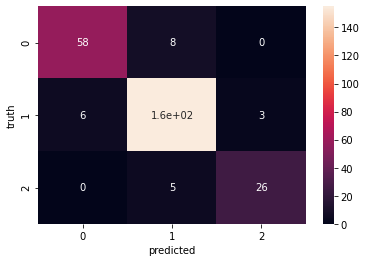

In [157]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [158]:
print(cm)

[[ 58   8   0]
 [  6 155   3]
 [  0   5  26]]


In [160]:
x=pd.DataFrame(X_train[1])
print(x)
print(x.shape)
y = np.expand_dims(x, axis = 0)
print(y.shape)
print(y_train[1])

             0
0        86.00
1        25.00
2         1.00
3    171785.00
4        29.21
5   3103000.00
6       130.00
7        50.00
8        18.00
9        18.00
10       43.36
11       19.50
12       10.00
13        0.00
14        5.90
15        1.10
16   599801.00
(17, 1)
(1, 17, 1)
1


In [134]:
joblib.dump(clf, "C:/Users/Rohit/Desktop/DSS_project/random_forest_final.joblib")

['C:/Users/Rohit/Desktop/DSS_project/random_forest_final.joblib']

In [135]:
load_clf= joblib.load("C:/Users/Rohit/Desktop/DSS_project/random_forest_final.joblib")

In [136]:
load_clf.score(X_test,y_test)

0.9157088122605364

In [137]:
df2.to_csv('Normalize_dataset')

In [149]:
x=X_train[1]
print(x)
print(x.shape)
y = np.expand_dims(x, axis = 0)
print(y.shape)

[-0.69003841 -0.54885887 -0.55313156 -0.92494592 -0.47263242 -0.71128616
 -0.41434339 -0.54319716 -0.64140709 -0.63067111  0.26498378 -0.34462494
 -0.26827494 -0.54964131 -0.856686    0.19230022 -0.87241494]
(17,)
(1, 17)


In [147]:
load_clf.predict(y)

array([1])

In [148]:
print(y_train[1])

1
